# 🏨 Hotel Booking Data Analysis: Exploratory Data Analysis (EDA)

#### Submitted By:
**Name:** Shivam Verma     **PRN:** 22070521132

**Semester:** VII     **Section:** C

**Faculty-In-Charge:** Dr. Bhupesh Kumar Dewangan

**Course:** Data Science (CA1 Submission)

**Institute:** Symbiosis Institute of Technology (SIT), Nagpur


## **📄Project Overview**

The project showcases an end-to-end Exploratory Data Analysis (EDA) on hotel booking data collected from multiple sources within Hotels. The aim is to explore operational and customer behavior patterns using structured datasets that include booking transactions, hotel details, room categories, and calendar data. By examining these dimensions, this analysis provides insights into occupancy trends, room category preferences, and booking behaviors across different timeframes. The goal is to help stakeholders make informed decisions based on data-driven observations.



| **Section**             | **Description** |
|-------------------------|-----------------|
| **Importing Libraries** | Loading all the essential Python libraries required for data analysis and visualization. |
| **Initial Data Overview**| Importing all the  essential datasets needed  to provide a comprehensive foundation for the analysis.|
| **Initial Data Exploration**| Conducted a brief review of the dataset’s structure, including column names, data types, and sample records, to gain a clear overview before deeper analysis.|
| **Data Cleaning**       | Address missing values, correct data types, standardize column names, and create derived columns. |
| **Data Transformation** | Convert, aggregate, or restructure data to prepare it for meaningful analysis and visualization. |
| **Univariate Analysis** | Analyze each variable individually using visualizations and summary metrics to understand its distribution. |



***
###  **1. Importing Libraries**
***


**1. Importing Libraries:** Loading all the essential Python libraries required for data analysis and visualization.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

***
###  **2. Data Overview**
***


**2.Initial Data Overview:** Importing all the  essential datasets needed  to provide a comprehensive foundation for the analysis.
We have 5 csv file.

   - orignal_bookings_data.csv
   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   

In [40]:
import os
import pandas as pd

file_path = r"C:\Users\win10\Desktop\DS LAB EDA\datasets\orignal_bookings_data.csv"

if os.path.exists(file_path):
    df_bookings = pd.read_csv(file_path)
    print("✅ File loaded successfully!")
    
else:
    print("❌ File not found at:", file_path)


✅ File loaded successfully!


In [41]:
df_date = pd.read_csv(r"C:\Users\win10\Desktop\DS LAB EDA\datasets\dim_date.csv")
df_hotels = pd.read_csv(r"C:\Users\win10\Desktop\DS LAB EDA\datasets\dim_hotels.csv")
df_rooms = pd.read_csv(r"C:\Users\win10\Desktop\DS LAB EDA\datasets\dim_rooms.csv")
df_agg_bookings = pd.read_csv(r"C:\Users\win10\Desktop\DS LAB EDA\datasets\fact_aggregated_bookings.csv")


***
###  **3. Data Exploration**
***


**3.Initial Data Exploration:**  Conducted a brief review of the dataset’s structure, including column names, data types, and sample records, to gain a clear overview before deeper analysis.

In [33]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [34]:
df_bookings.shape

(134590, 12)

In [45]:
print("Unique rooms category:",df_bookings.room_category.unique())

Unique rooms category: ['RT1' 'RT2' 'RT3' 'RT4']


In [43]:
print("Unique booking platforms:", df_bookings.booking_platform.unique())


Unique booking platforms: ['direct online' 'others' 'logtrip' 'tripster' 'makeyourtrip' 'journey'
 'direct offline']


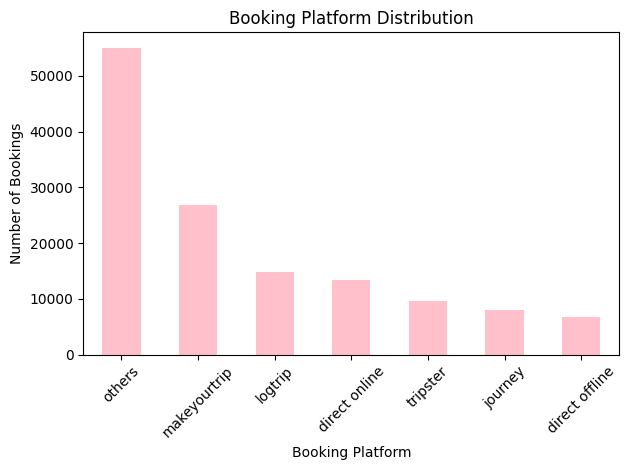

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the CSV (if not already)
df_bookings = pd.read_csv(r"C:\Users\win10\Desktop\DS LAB EDA\datasets\orignal_bookings_data.csv")

# Plot value counts with green bars
df_bookings['booking_platform'].value_counts().plot(kind='bar', color='pink')

# Optional: Add labels and title
plt.xlabel('Booking Platform')
plt.ylabel('Number of Bookings')
plt.title('Booking Platform Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [39]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [22]:
df_hotels.shape

(25, 4)

In [23]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


<Axes: xlabel='city'>

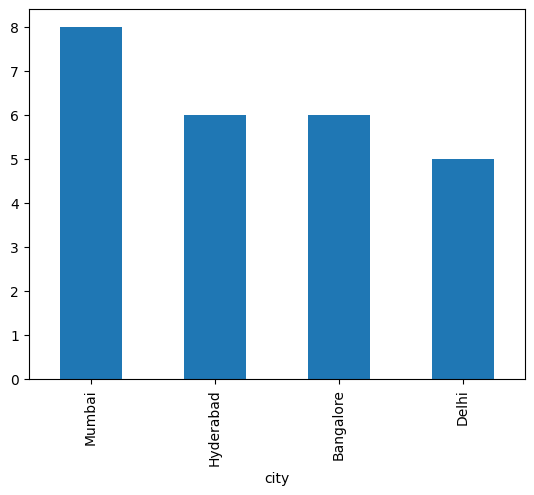

In [24]:
df_hotels.city.value_counts().plot(kind="bar")

In [25]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


***
###  **4. Data Cleaning**
***


In [26]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid Entries**

In [27]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


**As you can see there are some negative values present in the data ('no_guests'), so we remove the negative value and below is the output of it.** 

In [46]:
df_bookings['no_guests'] = df_bookings['no_guests'].abs()
df_bookings


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


**We use .abs() function to remove the negative sign present in our data('no_guests') to positive value.**

**Checking the null values present in our data.**

In [47]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

The no_guests column has only 3 missing values, which is minimal. Hence, it can be safely filled using the median or mode to maintain data consistency without significantly impacting analysis.

In [49]:
df_bookings['no_guests'].fillna(df_bookings['no_guests'].median(), inplace=True)
df_bookings


C:\Users\win10\AppData\Local\Temp\ipykernel_8116\2047626397.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bookings['no_guests'].fillna(df_bookings['no_guests'].median(), inplace=True)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


**Above we have fill the the data of 'no_guests' by using median() function.**

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

In [50]:
df_bookings.drop(columns=['ratings_given'], inplace=True)
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,4.0,RT4,logtrip,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,Checked Out,32300,32300


**We dropped the missing `ratings_given` values as the column is not required for any further analysis. Retaining a largely empty column could introduce unnecessary noise and affect data clarity.**


**In aggregate bookings we fill these null values mean or median**

In [51]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [52]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [54]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)
df_agg_bookings

C:\Users\win10\AppData\Local\Temp\ipykernel_8116\2708754821.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


***
### **4. Data Transformation**
***

**Create occupancy percentage column**

In [63]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


In [64]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

We use following approach to get rid of SettingWithCopyWarning

In [65]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667,0.766667


Convert it to a percentage value

In [66]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333,83.33
1,19562,1-May-22,RT1,28,30.0,0.933333,93.33
2,19563,1-May-22,RT1,23,30.0,0.766667,76.67


In [67]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,3.0,RT1,direct online,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,2.0,RT1,others,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,Checked Out,10920,10920


In [68]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
 5   occupancy_rate       9200 non-null   float64
 6   occ_pct              9200 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 503.2+ KB


***
###  **5. Meaningful Insights Generation**
***

**1. What is an average occupancy rate in each of the room categories?**

C:\Users\win10\AppData\Local\Temp\ipykernel_8116\632721060.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=avg_occupancy, x='room_category_name', y='occ_pct', palette='pastel')


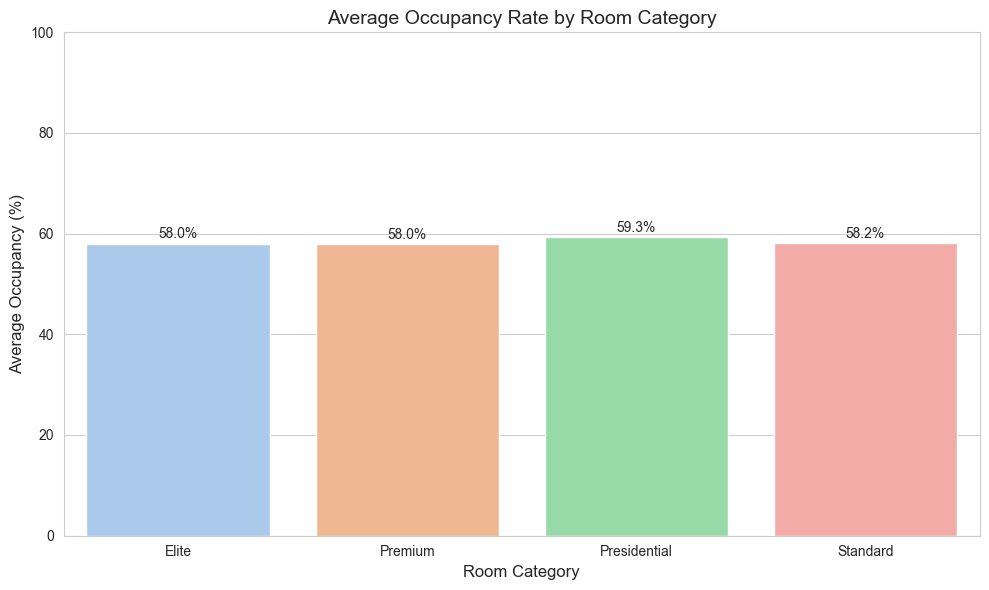

In [73]:
# Map room categories to meaningful names
room_names = {
    'RT1': 'Standard',
    'RT2': 'Elite',
    'RT3': 'Premium',
    'RT4': 'Presidential'
}

# Apply mapping
df_agg_bookings['room_category_name'] = df_agg_bookings['room_category'].map(room_names)

# Calculate average occupancy per room category
avg_occupancy = df_agg_bookings.groupby('room_category_name')['occ_pct'].mean().reset_index()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
barplot = sns.barplot(data=avg_occupancy, x='room_category_name', y='occ_pct', palette='pastel')

# Annotate bars with values
for index, row in avg_occupancy.iterrows():
    barplot.text(index, row['occ_pct'] + 1, f"{row['occ_pct']:.1f}%", ha='center', fontsize=10)

# Formatting
plt.title('Average Occupancy Rate by Room Category', fontsize=14)
plt.xlabel('Room Category', fontsize=12)
plt.ylabel('Average Occupancy (%)', fontsize=12)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


**2.Which hotel has the highest occupancy rate?**

C:\Users\win10\AppData\Local\Temp\ipykernel_8116\827238315.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hotel_occupancy_named, x='property_name', y='occupancy_rate', palette='viridis')


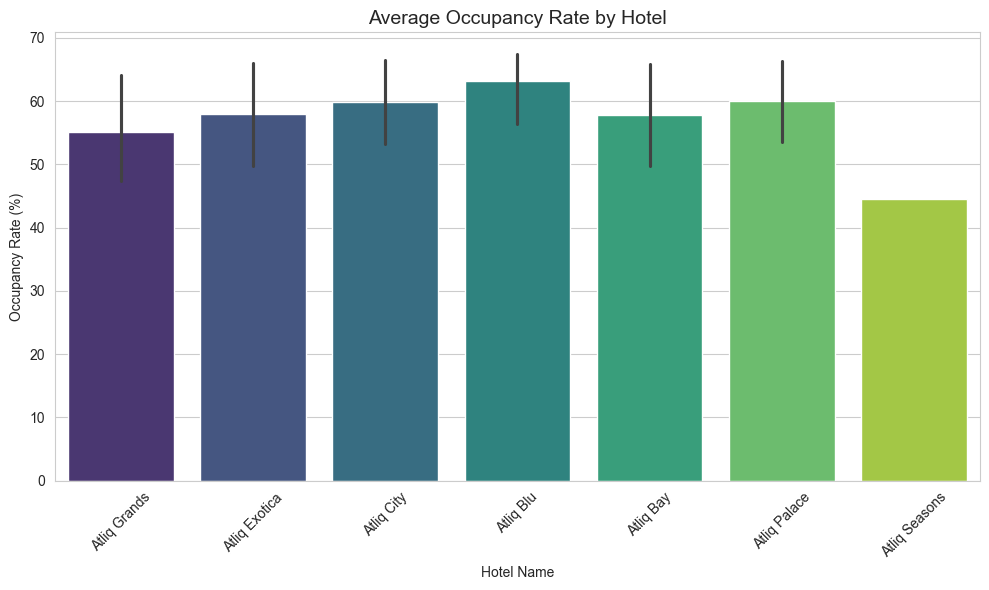

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df = pd.read_csv("datasets/fact_aggregated_bookings.csv")
hotels_df = pd.read_csv("datasets/dim_hotels.csv")

# Calculate occupancy rate
df['occupancy_rate'] = (df['successful_bookings'] / df['capacity']) * 100

# Group by hotel to get average occupancy rate
hotel_occupancy = df.groupby('property_id')['occupancy_rate'].mean().reset_index()

# Merge with hotel names
hotel_occupancy_named = hotel_occupancy.merge(hotels_df[['property_id', 'property_name']], on='property_id')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=hotel_occupancy_named, x='property_name', y='occupancy_rate', palette='viridis')
plt.title("Average Occupancy Rate by Hotel", fontsize=14)
plt.ylabel("Occupancy Rate (%)")
plt.xlabel("Hotel Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.What's the revenue realized per booking platform**

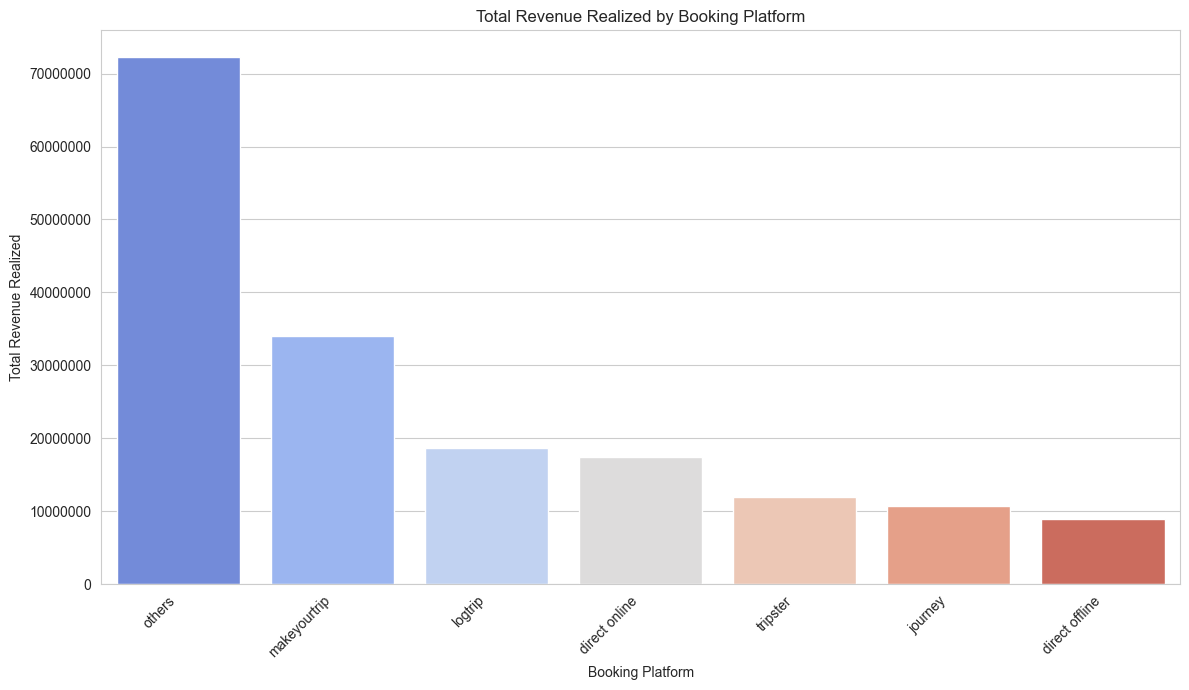

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_business_metrics():
    """
    Performs business metric analysis on booking data and generates graphs.
    """
    # Load the datasets
    try:
        fact_bookings_df = pd.read_csv('datasets/fact_aggregated_bookings.csv')
        original_bookings_df = pd.read_csv('datasets/orignal_bookings_data.csv')
        dim_hotels_df = pd.read_csv('datasets/dim_hotels.csv')
        dim_date_df = pd.read_csv('datasets/dim_date.csv')
    except FileNotFoundError as e:
        print(f"Error: One or more required CSV files not found. Please ensure all files are in the same directory as the script. Missing file: {e.filename}")
        return

    # --- Data Cleaning and Preparation for fact_aggregated_bookings_df ---
    # Drop rows with NaN values in 'capacity' column
    fact_bookings_df.dropna(subset=['capacity'], inplace=True)

    # Convert 'check_in_date' to datetime objects
    fact_bookings_df['check_in_date'] = pd.to_datetime(fact_bookings_df['check_in_date'], format='%d-%b-%y')

    # Calculate occupancy rate
    fact_bookings_df['occupancy_rate'] = (fact_bookings_df['successful_bookings'] / fact_bookings_df['capacity']) * 100

    # --- Data Cleaning and Preparation for original_bookings_df ---
    # Handling outliers in 'revenue_generated' by replacing values greater than 'revenue_realized'
    original_bookings_df.loc[original_bookings_df['revenue_generated'] > original_bookings_df['revenue_realized'], 'revenue_generated'] = original_bookings_df['revenue_realized']

    # Convert 'check_in_date' and 'checkout_date' to datetime objects, handling mixed formats with infer_datetime_format
    original_bookings_df['check_in_date'] = pd.to_datetime(original_bookings_df['check_in_date'], infer_datetime_format=True, errors='coerce')
    original_bookings_df['checkout_date'] = pd.to_datetime(original_bookings_df['checkout_date'], infer_datetime_format=True, errors='coerce')

    # Handle negative and null values in 'no_guests'
    median_guests = original_bookings_df['no_guests'].median()
    original_bookings_df['no_guests'] = original_bookings_df['no_guests'].apply(lambda x: median_guests if x <= 0 or pd.isna(x) else x)

    # --- Merge Datasets ---
    # Convert 'date' in dim_date_df to datetime
    dim_date_df['date'] = pd.to_datetime(dim_date_df['date'], format='%d-%b-%y')

    # Merge fact_aggregated_bookings_df with dim_hotels_df and dim_date_df
    merged_fact_bookings_df = fact_bookings_df.merge(dim_hotels_df, on='property_id', how='left')
    merged_fact_bookings_df = merged_fact_bookings_df.merge(dim_date_df, left_on='check_in_date', right_on='date', how='left')

    # Merge original_bookings_df with dim_hotels_df and dim_date_df
    merged_original_bookings_df = original_bookings_df.merge(dim_hotels_df, on='property_id', how='left')
    merged_original_bookings_df = merged_original_bookings_df.merge(dim_date_df, left_on='check_in_date', right_on='date', how='left')

    # Filter out rows where merge with dim_date resulted in NaT for check_in_date or date
    merged_original_bookings_df.dropna(subset=['date'], inplace=True)

    # --- Generate Graphs ---
    sns.set_style("whitegrid")

    # 3. Total Revenue Realized by Booking Platform
    revenue_by_platform = merged_original_bookings_df.dropna(subset=['booking_platform', 'revenue_realized']).groupby('booking_platform')['revenue_realized'].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=revenue_by_platform.index, y=revenue_by_platform.values, palette='coolwarm')
    plt.title('Total Revenue Realized by Booking Platform')
    plt.xlabel('Booking Platform')
    plt.ylabel('Total Revenue Realized')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show() # Show plot inline


if __name__ == "__main__":
    analyze_business_metrics()

**4. What is the total revenue contribution of each property category?**

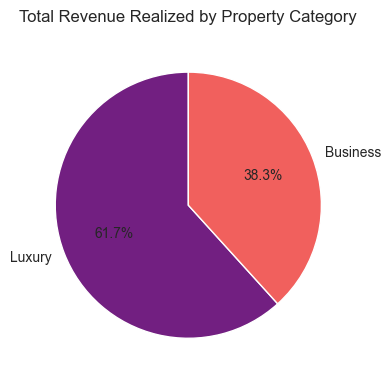

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume merged_original_bookings_df is prepared as in the full script
# For standalone execution, you'd need to include the data loading and merging steps:
# Load the datasets
original_bookings_df = pd.read_csv('datasets/orignal_bookings_data.csv')
dim_hotels_df = pd.read_csv('datasets/dim_hotels.csv')
dim_date_df = pd.read_csv('datasets/dim_date.csv')

# Data Cleaning and Preparation for original_bookings_df
original_bookings_df.loc[original_bookings_df['revenue_generated'] > original_bookings_df['revenue_realized'], 'revenue_generated'] = original_bookings_df['revenue_realized']
original_bookings_df['check_in_date'] = pd.to_datetime(original_bookings_df['check_in_date'], infer_datetime_format=True, errors='coerce')
original_bookings_df['checkout_date'] = pd.to_datetime(original_bookings_df['checkout_date'], infer_datetime_format=True, errors='coerce')
median_guests = original_bookings_df['no_guests'].median()
original_bookings_df['no_guests'] = original_bookings_df['no_guests'].apply(lambda x: median_guests if x <= 0 or pd.isna(x) else x)

# Convert 'date' in dim_date_df to datetime
dim_date_df['date'] = pd.to_datetime(dim_date_df['date'], format='%d-%b-%y')

# Merge original_bookings_df with dim_hotels_df and dim_date_df
merged_original_bookings_df = original_bookings_df.merge(dim_hotels_df, on='property_id', how='left')
merged_original_bookings_df = merged_original_bookings_df.merge(dim_date_df, left_on='check_in_date', right_on='date', how='left')
merged_original_bookings_df.dropna(subset=['date'], inplace=True)


# 2. Total Revenue Realized by Property Category (Pie Chart)
revenue_by_category = merged_original_bookings_df.dropna(subset=['category', 'revenue_realized']).groupby('category')['revenue_realized'].sum().sort_values(ascending=False)

plt.figure(figsize=(4, 4)) # A square figure is generally better for pie charts
plt.pie(revenue_by_category.values, labels=revenue_by_category.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma', len(revenue_by_category)))
plt.title('Total Revenue Realized by Property Category')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show() # Show plot inline

**5. What is the monthly trend in revenue realized over time?**

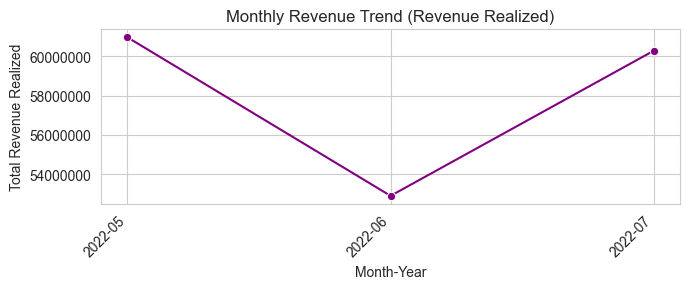

In [119]:
plt.figure(figsize=(7, 3))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='purple')
plt.title('Monthly Revenue Trend (Revenue Realized)')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue Realized')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


**6. How does hotel capacity relate to the number of successful bookings across different cities?**

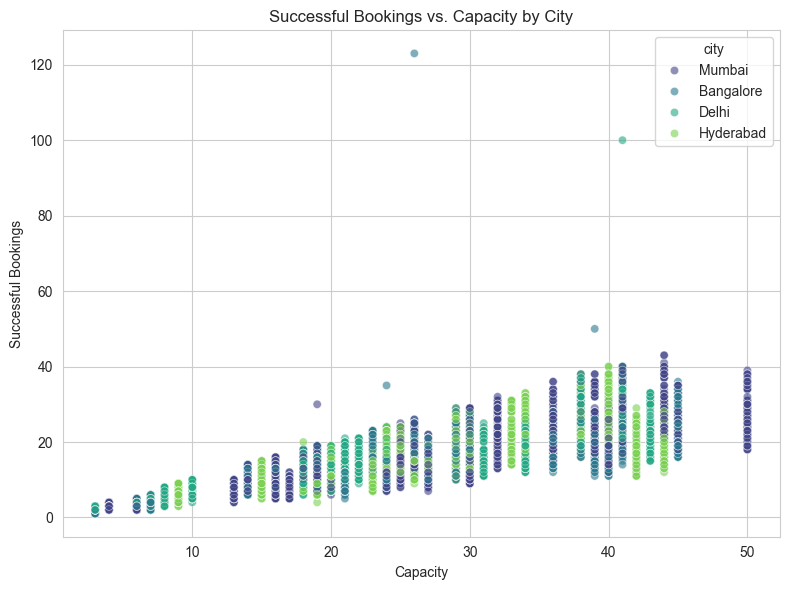

In [ ]:
# Scatter Plot: Successful Bookings vs. Capacity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_fact_bookings_df, x='capacity', y='successful_bookings', alpha=0.6, hue='city', palette='viridis')
plt.title('Successful Bookings vs. Capacity by City')
plt.xlabel('Capacity')
plt.ylabel('Successful Bookings')
plt.tight_layout()
plt.show()




**7. What is the variation in revenue realized between weekdays and weekends?**

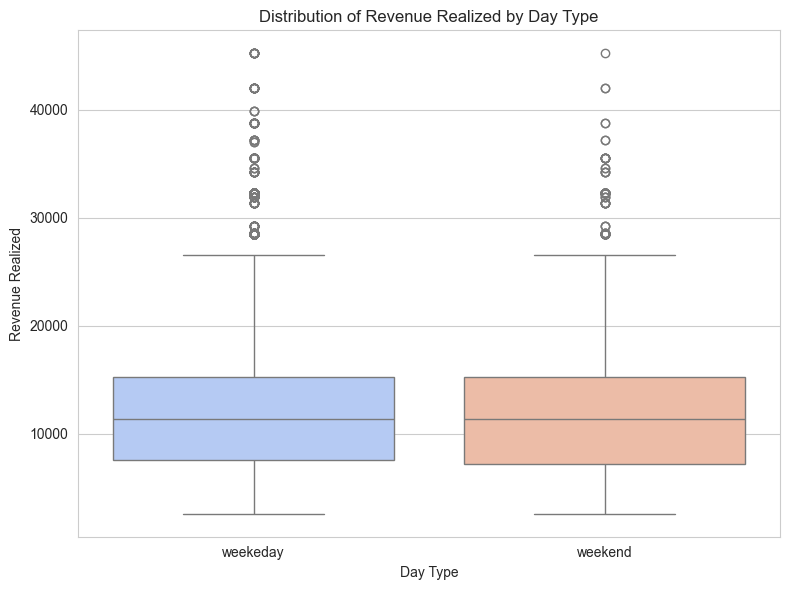

In [ ]:
# Box Plot: Distribution of Revenue Realized by Day Type
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_original_bookings_df, x='day_type', y='revenue_realized', palette='coolwarm')
plt.title('Distribution of Revenue Realized by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Revenue Realized')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()
